In [1]:
#定義爬蟲
import requests
from io import StringIO
import pandas as pd
import numpy as np

def crawl_price(date):
    r = requests.post('http://www.twse.com.tw/exchangeReport/MI_INDEX?response=csv&date=' 
                      + str(date).split(' ')[0].replace('-','') + '&type=ALL')
    ret = pd.read_csv(StringIO("\n".join([i.translate({ord(c): None for c in ' '}) 
                                        for i in r.text.split('\n') 
                                        if len(i.split('",')) == 17 and i[0] != '='])), header=0)
    ret = ret.set_index('證券代號')
    
    #把逗號拿掉
    ret['成交金額'] = ret['成交金額'].str.replace(',','')
    ret['成交股數'] = ret['成交股數'].str.replace(',','')
    #四檔價位也把逗號拿掉
    ret['開盤價'] = ret['開盤價'].str.replace(',','')
    ret['最高價'] = ret['最高價'].str.replace(',','')
    ret['最低價'] = ret['最低價'].str.replace(',','')
    ret['收盤價'] = ret['收盤價'].str.replace(',','')
    
    return ret


In [2]:
#開始爬蟲
import datetime
import time,random

data = {}
n_days = 33
date = datetime.datetime.now()
fail_count = 0
allow_continuous_fail_count = 5
while len(data) < n_days:

    print('parsing', date)
    # 使用 crawPrice 爬資料
    try:
        # 抓資料
        data[date] = crawl_price(date)
        print('success!')
        fail_count = 0
    except:
        # 假日爬不到
        print('fail! check the date is holiday')
        fail_count += 1
        if fail_count == allow_continuous_fail_count:
            raise
            break
    
    # 減一天
    date -= datetime.timedelta(days=1)
    i=random.randint(10,20)#設多一點比較不會被鎖唷
    time.sleep(i)

parsing 2018-12-29 00:23:31.667333
fail! check the date is holiday
parsing 2018-12-28 00:23:31.667333
success!
parsing 2018-12-27 00:23:31.667333
success!
parsing 2018-12-26 00:23:31.667333
success!
parsing 2018-12-25 00:23:31.667333
success!
parsing 2018-12-24 00:23:31.667333
success!
parsing 2018-12-23 00:23:31.667333
fail! check the date is holiday
parsing 2018-12-22 00:23:31.667333
success!
parsing 2018-12-21 00:23:31.667333
success!
parsing 2018-12-20 00:23:31.667333
success!
parsing 2018-12-19 00:23:31.667333
success!
parsing 2018-12-18 00:23:31.667333
success!
parsing 2018-12-17 00:23:31.667333
success!
parsing 2018-12-16 00:23:31.667333
fail! check the date is holiday
parsing 2018-12-15 00:23:31.667333
fail! check the date is holiday
parsing 2018-12-14 00:23:31.667333
success!
parsing 2018-12-13 00:23:31.667333
success!
parsing 2018-12-12 00:23:31.667333
success!
parsing 2018-12-11 00:23:31.667333
success!
parsing 2018-12-10 00:23:31.667333
success!
parsing 2018-12-09 00:23:31.

In [3]:
close = pd.DataFrame({k:d['收盤價'] for k,d in data.items()}).transpose()
close.index = pd.to_datetime(close.index)
print('抓了:',close.shape[0],'天的資料')
print('抓了:',close.shape[1],'檔的股票')
close

抓了: 33 天的資料
抓了: 999 檔的股票


,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2018-11-15 00:23:31.667333,36.15,33.40,12.85,19.15,7.23,14.80,13.75,21.10,25.85,30.85,...,30.10,90.60,NaN,70.10,58.00,16.30,45.85,11.70,11.95,82.20
2018-11-16 00:23:31.667333,36.45,33.95,12.90,19.25,7.23,14.60,13.90,21.10,25.95,31.45,...,30.00,90.30,NaN,69.50,57.90,16.35,46.20,11.90,12.00,80.30
2018-11-19 00:23:31.667333,43.90,38.25,14.75,26.00,8.00,10.90,16.60,48.75,24.95,25.75,...,55.00,76.30,NaN,78.90,35.15,24.80,62.30,30.60,20.55,13.10
2018-11-20 00:23:31.667333,36.65,33.25,13.05,19.25,7.25,14.60,13.95,21.00,25.55,31.70,...,30.35,90.20,NaN,70.10,57.90,16.30,47.45,12.05,12.10,80.00
2018-11-21 00:23:31.667333,35.70,33.00,13.05,19.15,7.28,14.75,13.95,20.80,25.70,31.70,...,30.25,89.60,NaN,70.20,58.30,16.30,47.85,12.10,12.05,80.30
2018-11-22 00:23:31.667333,34.85,32.60,12.95,19.15,7.21,14.90,13.95,20.90,25.35,31.75,...,30.00,87.90,NaN,69.90,58.00,16.35,47.15,12.05,11.90,76.50
2018-11-23 00:23:31.667333,34.70,32.55,13.00,19.15,7.25,14.85,14.00,21.00,25.25,31.60,...,30.00,88.10,NaN,69.50,58.00,16.35,46.55,12.20,11.95,74.80
2018-11-26 00:23:31.667333,35.35,33.05,13.80,19.25,7.30,14.80,14.00,21.15,25.70,31.40,...,30.50,89.00,51.50,69.40,58.10,16.40,47.00,12.70,11.90,72.30
2018-11-27 00:23:31.667333,33.50,32.30,13.95,19.20,7.40,14.85,14.00,21.55,25.50,31.25,...,30.30,88.90,52.00,69.40,58.20,16.45,47.30,12.60,12.05,73.00
2018-11-28 00:23:31.667333,34.05,33.05,13.90,19.15,7.40,14.75,14.00,21.40,25.40,32.35,...,30.50,91.50,51.50,69.50,58.30,16.50,48.35,12.60,11.95,71.00


In [4]:
#把'--'補值進去
#把全部值轉成float
for column in close: 
    close[column].replace('--', None, method='pad', inplace=True)#用前一個值補上
    close[column].replace('--', None, method='bfill', inplace=True)#用後一個值補上
close=close.astype(float)#轉成float
close.head()

,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2018-11-15 00:23:31.667333,36.15,33.40,12.85,19.15,7.23,14.80,13.75,21.10,25.85,30.85,...,30.10,90.6,NaN,70.1,58.00,16.30,45.85,11.70,11.95,82.2
2018-11-16 00:23:31.667333,36.45,33.95,12.90,19.25,7.23,14.60,13.90,21.10,25.95,31.45,...,30.00,90.3,NaN,69.5,57.90,16.35,46.20,11.90,12.00,80.3
2018-11-19 00:23:31.667333,43.90,38.25,14.75,26.00,8.00,10.90,16.60,48.75,24.95,25.75,...,55.00,76.3,NaN,78.9,35.15,24.80,62.30,30.60,20.55,13.1
2018-11-20 00:23:31.667333,36.65,33.25,13.05,19.25,7.25,14.60,13.95,21.00,25.55,31.70,...,30.35,90.2,NaN,70.1,57.90,16.30,47.45,12.05,12.10,80.0
2018-11-21 00:23:31.667333,35.70,33.00,13.05,19.15,7.28,14.75,13.95,20.80,25.70,31.70,...,30.25,89.6,NaN,70.2,58.30,16.30,47.85,12.10,12.05,80.3


In [5]:
#定義5日,10日,20日的'均收盤價'移動平均線
close5 = close.rolling(5, min_periods=5).mean()
close10 = close.rolling(10, min_periods=10).mean()
close20 = close.rolling(20, min_periods=20).mean()

In [6]:
#定義選股策略
def rising_curve(Strategy):
    
    #定義flower(芙蓉出水)
    A=close.iloc[-1] > close5.iloc[-1]  #今日收盤價大於5日均價 
    B=close.iloc[-1] > close10.iloc[-1] #今日收盤價大於10日均價 
    C=close.iloc[-1] > close20.iloc[-1] #今日收盤價大於20日均價
    
    D=close.iloc[-5] < close5.iloc[-5]  #5日前收盤價小於5日均價
    E=close.iloc[-5] < close10.iloc[-5] #5日前收盤價小於10日均價
    F=close.iloc[-5] < close20.iloc[-5] #5日前收盤價小於20日均價
    
    #定義avgtrans(均線挪移)
    G=  close5.iloc[-1] > close10.iloc[-1] #今日5日均價大於10日均價
    H= close10.iloc[-1] > close20.iloc[-1] #今日10日均價大於20日均價
    I=  close5.iloc[-5] < close10.iloc[-5] #5日前5日均價小於10日均價
    J= close10.iloc[-5] < close20.iloc[-5] #5日前10日均價小於20日均價
    
    if Strategy == 'flower':
        answer = A & B & C & D & E & F
    if Strategy == 'avgtrans':
        answer = G & H & I & J
    if Strategy == 'avgtrans+flower':
        answer = A & B & C & D & E & F & G & H & I & J         
    return answer

In [9]:
#使用選股策略找出符合的股票
GoldX=rising_curve('avgtrans+flower')
print('match:',len(GoldX[GoldX==True]),'檔')
GoldX[GoldX==True]

match: 1 檔


2748    True
dtype: bool

In [10]:
#設定股票清單
sid_list=GoldX[GoldX==True].index
sid_list

Index(['2748'], dtype='object')

In [11]:
#定義'開始日期'和'結束日期'和一些像是'繪圖','finance工具'等等套件
import pandas_datareader as web
import matplotlib.pyplot as plt
import mpl_finance as mpf

start = datetime.datetime(2018, 11, 22)
end = datetime.datetime(2018, 12, 28)
print('start:',start)
print('end:',end)

start: 2018-11-22 00:00:00
end: 2018-12-28 00:00:00


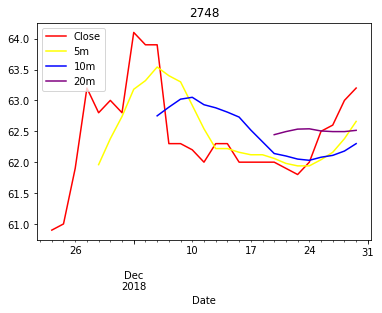

In [12]:
#依序畫出股票走勢
for sid in sid_list:
    
    TARGET = sid + '.tw'
    c = web.DataReader( TARGET , 'yahoo', start, end)
    c5 = c['Close'].rolling(5, min_periods=5).mean()
    c10 = c['Close'].rolling(10, min_periods=10).mean()
    c20 = c['Close'].rolling(20, min_periods=20).mean()
    c.plot(y="Close",color='red')
    c5.plot(label='5m',color='yellow')
    c10.plot(label='10m',color='blue')
    c20.plot(label='20m',color='purple')
    plt.legend(loc='upper left')  
    plt.title(sid)
    plt.show()